# Anomaly Detection Core
**Student:** Matthew Malueg

## Task

- Use anomaly detection techniques to detect credit card fraud.
- The stakeholder reports that they have found that about 0.4% of transactions are fraudulent, and 99.6% are valid.
- The task will be to locate anomalous transactions in this data using KMeans and IsolationForest models.

### Imports, loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
df = pd.read_csv("Data/credit_card.csv")
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.140805,1.364988,1.705569,-0.332468,0.338780,-0.155695,0.982181,-0.556155,1.932499,1.266155,...,0.515617,-0.302928,0.074208,-0.073871,0.157594,-0.491954,0.184607,-0.123496,-0.311603,9.99
9996,-1.317434,0.500729,2.177423,-0.221457,0.738280,-1.285625,0.472660,-0.296602,1.299262,-0.569598,...,-0.108271,-0.486328,-1.048003,-0.262663,0.275009,0.161061,-0.040818,-0.025942,-0.132984,7.17
9997,-2.408371,-0.529543,3.236927,-2.485863,-0.465005,-0.342819,-0.749428,0.008470,4.874550,-0.917879,...,-0.152467,-0.367446,0.637362,-0.885188,0.587379,0.694560,-0.070796,0.382392,-0.177974,29.00
9998,0.116313,0.094182,0.439869,0.875843,2.080461,4.304726,-0.581838,0.801970,1.447210,-0.017145,...,0.387494,0.116751,0.735325,0.165807,0.966368,-1.162912,-0.284162,0.141743,0.044704,61.00


### Part 1 - KMeans

- Determine which points are anomalous based on distances of each point to each cluster. Anomalous points will lie farther outside the norm.

In [3]:
# Scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [4]:
# Fit KMeans model with 3 clusters. Use random state 42.
kmeans = KMeans(n_clusters=3, n_init=10, random_state = 42)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [5]:
# Use cdist to create matrix of distances between each point and each cluster
distances = cdist(df_scaled, kmeans.cluster_centers_, 'euclidean')
distances

array([[2.80468161, 4.39326354, 5.85721494],
       [2.42642963, 3.68608746, 5.07508117],
       [6.5426218 , 7.33737825, 8.65600243],
       ...,
       [7.25374437, 6.4078623 , 8.24946223],
       [6.81346291, 6.26852314, 4.97246188],
       [4.88282778, 3.67991041, 5.7359755 ]])

In [6]:
## Define a list of the indicies of the anomalous data using the stakeholder threshold (99.6%)

# Get the minimum distance to any cluster for each point
min_distances = np.min(distances, axis=1)
# Define the threshold
threshold = np.percentile(min_distances, 99.6)

# Filter the anomalies
filter_anomalies = min_distances > threshold

# Getting the row indices of the anomalies
km_anomalies = df[filter_anomalies].index
print(f'There are {len(km_anomalies)} identified anomalies.')
km_anomalies

There are 40 identified anomalies.


Int64Index([ 159, 1376, 1619, 2156, 2212, 2439, 2594, 2654, 2756, 2911, 2914,
            2917, 2923, 3443, 4779, 5303, 5412, 5413, 5529, 5674, 5704, 5764,
            6489, 6643, 6672, 7322, 7338, 7470, 7596, 7597, 8124, 8163, 8437,
            8442, 8856, 8939, 8999, 9071, 9304, 9326],
           dtype='int64')

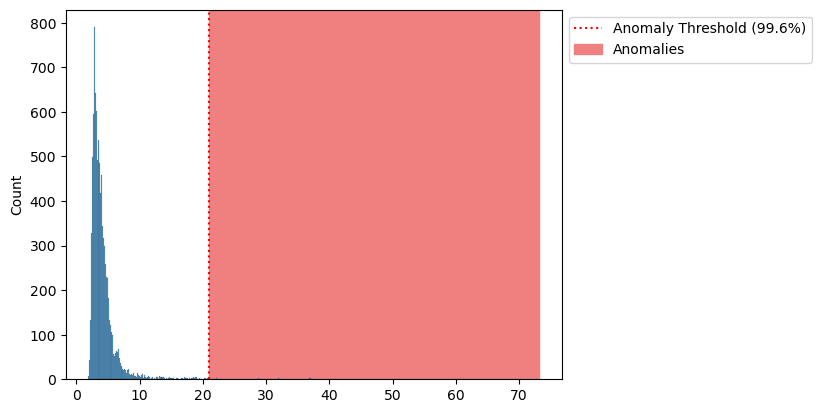

In [7]:
# Visualize the distribution of distances and the anomaly threshold.
ax = sns.histplot(min_distances)
ax.axvline(threshold, color='red', ls=':', label='Anomaly Threshold (99.6%)')
ax.axvspan(threshold, ax.get_xlim()[1], color='lightcoral',zorder=0, label='Anomalies')
ax.legend(bbox_to_anchor=[1,1]);

### Part 2 - Isolation Forest

- Determine which points are anomalous based on number of branches required to reach the terminal node. More anomalous data will be reached with fewer branches .

In [8]:
## Instantiate and fit the model
# Instantiate the model with a contaimination of 0.004
iso_996 = IsolationForest(contamination=0.004, random_state = 42)
# Fit the model using .values to avoid a warning
iso_996.fit(df.values)

IsolationForest(contamination=0.004, random_state=42)

In [9]:
# Obtain results from the model
predictions = iso_996.predict(df.values)
predictions[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
## Obtain an index of anomalous data
# Make a predictions filter
iso_996_filter = (predictions == -1)
# Get list of indicies
iso_anomalies = df[iso_996_filter].index

print(f'There are {len(iso_anomalies)} identified anomalies.')
iso_anomalies

There are 40 identified anomalies.


Int64Index([ 159, 1619, 2156, 2756, 2858, 2914, 2917, 2923, 5303, 5412, 5413,
            5704, 6311, 6489, 6581, 6595, 6634, 6643, 6672, 6757, 6761, 6798,
            6829, 7338, 7470, 7596, 7597, 8124, 8163, 8437, 8442, 8627, 8645,
            8667, 8670, 8856, 8999, 9071, 9304, 9326],
           dtype='int64')

#### Part 3 - Compare anomalies from KMeans and Isolation Forest

**How many anomalies did the two approaches agree on?**

In [11]:
# Make a list of anomalies found with both methods
both = [a for a in iso_anomalies if a in km_anomalies]
print(f'The two approaches, KMeans and Isolation Forest, agreed on {len(both)} anomalies.')

The two approaches, KMeans and Isolation Forest, agreed on 27 anomalies.


**What percentage of the anomalies did the two approaches agree on?**

In [12]:
print(f'The different approaches had {round((27/40)*100, 2)}% of anomalies in common.')

The different approaches had 67.5% of anomalies in common.
